In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
Cleveland = pd.read_csv(r'processed.cleveland.data', header=None,names=columns)
Switzerland = pd.read_csv(r'processed.switzerland.data', header=None,names=columns )
Hungarian = pd.read_csv(r'processed.hungarian.data', header=None,names=columns )


In [7]:
Cleveland['Country']= 'Cleveland'
Switzerland['Country']= 'Switzerland'
Hungarian['Country']= 'Hungarian'
Switzerland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Country
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1,Switzerland
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1,Switzerland
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3,Switzerland
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1,Switzerland
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2,Switzerland


In [8]:
Final_df = pd.concat([Cleveland, Switzerland,Hungarian], axis=0)
Final_df.shape
 
Final_df.set_index('Country', inplace=True)
Final_df['num'].value_counts()

0    360
1    209
2     68
3     65
4     18
Name: num, dtype: int64

In [9]:
Final_df.shape

(720, 14)

In [10]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, Cleveland to Hungarian
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  720 non-null    object 
 4   chol      720 non-null    object 
 5   fbs       720 non-null    object 
 6   restecg   720 non-null    object 
 7   thalach   720 non-null    object 
 8   exang     720 non-null    object 
 9   oldpeak   720 non-null    object 
 10  slope     720 non-null    object 
 11  ca        720 non-null    object 
 12  thal      720 non-null    object 
 13  num       720 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 84.4+ KB


In [11]:
list(Final_df.where(Final_df=='?').fillna(0).values.reshape(-1)).count('?')

1061

In [12]:
for i in Final_df.columns:
    print(i, list(Final_df[i].where(Final_df[i]=='?').fillna(0).values.reshape(-1)).count('?'))
    

age 0
sex 0
cp 0
trestbps 3
chol 23
fbs 83
restecg 2
thalach 2
exang 2
oldpeak 6
slope 207
ca 413
thal 320
num 0


In [13]:
Final_df = Final_df.drop(['slope','ca','thal'],axis=1)

In [14]:
Final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
Country,,,,,,,,,,,
Cleveland,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
Cleveland,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
Cleveland,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
Cleveland,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
Cleveland,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
Hungarian,52.0,1.0,4.0,160,331,0,0,94,1,2.5,1
Hungarian,54.0,0.0,3.0,130,294,0,1,100,1,0,1
Hungarian,56.0,1.0,4.0,155,342,1,0,150,1,3,1


In [15]:
for i in Final_df.columns:
    print(i, list(Final_df[i].where(Final_df[i]=='?').fillna(0).values.reshape(-1)).count('?'))
    

age 0
sex 0
cp 0
trestbps 3
chol 23
fbs 83
restecg 2
thalach 2
exang 2
oldpeak 6
num 0


In [16]:
Final_df.dtypes

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
num           int64
dtype: object

In [17]:
numeric = Final_df.select_dtypes(np.number)
char = Final_df.select_dtypes(np.object)

In [18]:
## Numeric Value 

In [19]:
numeric.head()

,age,sex,cp,num
Country,,,,
Cleveland,63.0,1.0,1.0,0
Cleveland,67.0,1.0,4.0,2
Cleveland,67.0,1.0,4.0,1
Cleveland,37.0,1.0,3.0,0
Cleveland,41.0,0.0,2.0,0


In [20]:
for i in numeric.columns:
    print(i, list(numeric[i].where(numeric[i]=='?').fillna(0).values.reshape(-1)).count('?'))

age 0
sex 0
cp 0
num 0


In [21]:
numeric['age'].unique

<bound method Series.unique of Country
Cleveland    63.0
Cleveland    67.0
Cleveland    67.0
Cleveland    37.0
Cleveland    41.0
             ... 
Hungarian    52.0
Hungarian    54.0
Hungarian    56.0
Hungarian    58.0
Hungarian    65.0
Name: age, Length: 720, dtype: float64>

In [22]:
numeric['sex'].value_counts()

ana_1 = numeric['sex']

In [23]:
numeric['cp'].value_counts()
ana_2 = numeric['cp']

<AxesSubplot:xlabel='age', ylabel='Density'>

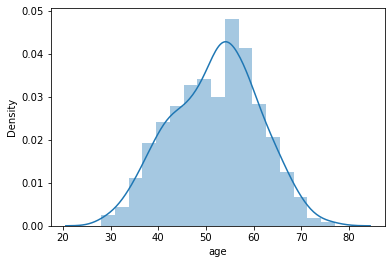

In [24]:
sns.distplot(numeric['age'])

In [25]:
# catagorical val

In [26]:
char

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
Country,,,,,,,
Cleveland,145,233,1,2,150,0,2.3
Cleveland,160,286,0,2,108,1,1.5
Cleveland,120,229,0,2,129,1,2.6
Cleveland,130,250,0,0,187,0,3.5
Cleveland,130,204,0,2,172,0,1.4
...,...,...,...,...,...,...,...
Hungarian,160,331,0,0,94,1,2.5
Hungarian,130,294,0,1,100,1,0
Hungarian,155,342,1,0,150,1,3


In [27]:
for i in char.columns:
    print(i, list(char[i].where(char[i]=='?').fillna(0).values.reshape(-1)).count('?'))
    

trestbps 3
chol 23
fbs 83
restecg 2
thalach 2
exang 2
oldpeak 6


In [28]:
# char = char.replace('?',np.nan)
# print(char)

In [29]:
# for i in char.columns:
#     print(i, list(char[i].where(char[i]=='?').fillna(0).values.reshape(-1)).count('?'))

In [30]:
char.describe()

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
count,720,720,720,720,720,720,720.0
unique,86,307,5,7,188,5,77.0
top,120,0,0,0,150,0,0.0
freq,78,123,309,320,32,272,288.0


In [31]:
# for i in range(7):
#     print(char[char.columns[i]].value_counts)

In [32]:
char.head

<bound method NDFrame.head of           trestbps chol fbs restecg thalach exang oldpeak
Country                                                  
Cleveland      145  233   1       2     150     0     2.3
Cleveland      160  286   0       2     108     1     1.5
Cleveland      120  229   0       2     129     1     2.6
Cleveland      130  250   0       0     187     0     3.5
Cleveland      130  204   0       2     172     0     1.4
...            ...  ...  ..     ...     ...   ...     ...
Hungarian      160  331   0       0      94     1     2.5
Hungarian      130  294   0       1     100     1       0
Hungarian      155  342   1       0     150     1       3
Hungarian      180  393   0       0     110     1       1
Hungarian      130  275   0       1     115     1       1

[720 rows x 7 columns]>

In [36]:
char.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, Cleveland to Hungarian
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trestbps  720 non-null    object
 1   chol      720 non-null    object
 2   fbs       720 non-null    object
 3   restecg   720 non-null    object
 4   thalach   720 non-null    object
 5   exang     720 non-null    object
 6   oldpeak   720 non-null    object
dtypes: object(7)
memory usage: 45.0+ KB


In [37]:
char.isna().sum()

trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
dtype: int64

In [38]:
char.describe()
char.quantile(0.5)

Series([], Name: 0.5, dtype: float64)

In [39]:
char['oldpeak'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0.0, 0.5,
       1.6, 1.0, 1.2, 0.2, 1.8, 3.2, 2.4, 2.0, 2.5, 2.2, 2.8, 3.0, 3.4,
       6.2, 4.0, 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4, '.7', '.2', '?', '1', '2.8', '0', '-1.1', '1.6', '-1.5',
       '1.5', '2', '.5', '-.1', '-2.6', '2.1', '-.7', '2.2', '3', '.1',
       '.3', '-2', '-1', '1.8', '1.4', '2.6', '.9', '2.4', '1.1', '.4',
       '2.5', '1.7', '-.8', '-.5', '-.9', '3.7', '1.3', 5.0], dtype=object)

In [40]:
char['trestbps'].replace(to_replace='?',value=130,inplace=True)
char['chol'].replace(to_replace='?',value=227,inplace=True)
# char['fbs'].replace(to_replace='?',value=130,inplace=True)
# char['restecg'].replace(to_replace='?',value=130,inplace=True)
char['thalach'].replace(to_replace='?',value=142,inplace=True)
# char['exang'].replace(to_replace='?',value=130,inplace=True)
char['oldpeak'].replace(to_replace='?',value=0.2,inplace=True)

In [41]:
char.isna().sum()

trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
dtype: int64

In [43]:
char['fbs'].value_counts()

0      309
0.0    258
?       83
1.0     45
1       25
Name: fbs, dtype: int64

In [44]:
char['restecg'].value_counts()

0      320
0.0    151
2.0    148
1       82
2       13
1.0      4
?        2
Name: restecg, dtype: int64

In [45]:
char['exang'].value_counts()

0      272
0.0    204
1      143
1.0     99
?        2
Name: exang, dtype: int64

In [46]:
char['fbs'].replace(to_replace='?',value=0,inplace=True)
char['restecg'].replace(to_replace='?',value=0,inplace=True)
char['exang'].replace(to_replace='?',value=0,inplace=True)

In [47]:
char['fbs'].value_counts()

0.0    341
0      309
1.0     45
1       25
Name: fbs, dtype: int64

In [48]:
char['restecg'].value_counts()

0      320
0.0    153
2.0    148
1       82
2       13
1.0      4
Name: restecg, dtype: int64

In [49]:
char['exang'].value_counts()

0      272
0.0    206
1      143
1.0     99
Name: exang, dtype: int64

In [51]:
char['trestbps'] = char.trestbps.astype('float64')
char['fbs'] = char.fbs.astype('float64')
char['chol'] = char.chol.astype('float64')
char['restecg'] = char.restecg.astype('float64')
char['thalach'] = char.thalach.astype('float64')
char['exang'] = char.exang.astype('float64')
char['oldpeak'] = char.oldpeak.astype('float64')

In [52]:
char.dtypes

trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
dtype: object

In [53]:
numeric.dtypes

age    float64
sex    float64
cp     float64
num      int64
dtype: object

In [77]:
df = pd.concat([char,numeric], axis = 1)

In [64]:
df['cp'].value_counts()

4.0    365
2.0    160
3.0    157
1.0     38
Name: cp, dtype: int64

In [78]:
df

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,age,sex,cp,num
Country,,,,,,,,,,,
Cleveland,145.0,233.0,1.0,2.0,150.0,0.0,2.3,63.0,1.0,1.0,0
Cleveland,160.0,286.0,0.0,2.0,108.0,1.0,1.5,67.0,1.0,4.0,2
Cleveland,120.0,229.0,0.0,2.0,129.0,1.0,2.6,67.0,1.0,4.0,1
Cleveland,130.0,250.0,0.0,0.0,187.0,0.0,3.5,37.0,1.0,3.0,0
Cleveland,130.0,204.0,0.0,2.0,172.0,0.0,1.4,41.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
Hungarian,160.0,331.0,0.0,0.0,94.0,1.0,2.5,52.0,1.0,4.0,1
Hungarian,130.0,294.0,0.0,1.0,100.0,1.0,0.0,54.0,0.0,3.0,1
Hungarian,155.0,342.0,1.0,0.0,150.0,1.0,3.0,56.0,1.0,4.0,1


In [79]:
cat = df.drop(['trestbps','chol','thalach','age','oldpeak','num'], axis=1)
non_cat = df.drop(['fbs','restecg','exang','sex','cp','num'], axis =1)

In [80]:
cat

,fbs,restecg,exang,sex,cp
Country,,,,,
Cleveland,1.0,2.0,0.0,1.0,1.0
Cleveland,0.0,2.0,1.0,1.0,4.0
Cleveland,0.0,2.0,1.0,1.0,4.0
Cleveland,0.0,0.0,0.0,1.0,3.0
Cleveland,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...
Hungarian,0.0,0.0,1.0,1.0,4.0
Hungarian,0.0,1.0,1.0,0.0,3.0
Hungarian,1.0,0.0,1.0,1.0,4.0


In [81]:
non_cat

,trestbps,chol,thalach,oldpeak,age
Country,,,,,
Cleveland,145.0,233.0,150.0,2.3,63.0
Cleveland,160.0,286.0,108.0,1.5,67.0
Cleveland,120.0,229.0,129.0,2.6,67.0
Cleveland,130.0,250.0,187.0,3.5,37.0
Cleveland,130.0,204.0,172.0,1.4,41.0
...,...,...,...,...,...
Hungarian,160.0,331.0,94.0,2.5,52.0
Hungarian,130.0,294.0,100.0,0.0,54.0
Hungarian,155.0,342.0,150.0,3.0,56.0


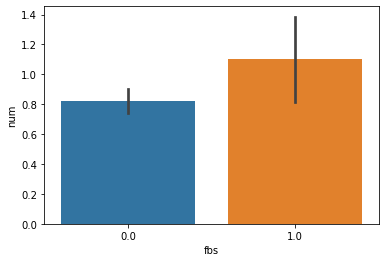

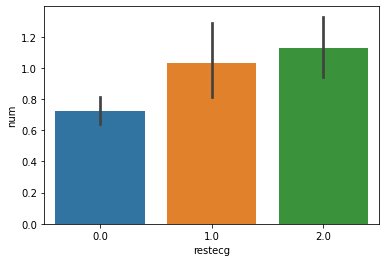

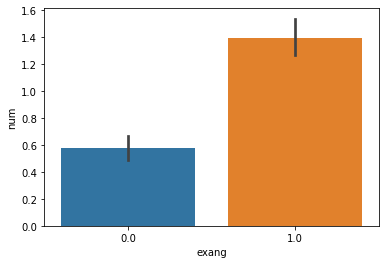

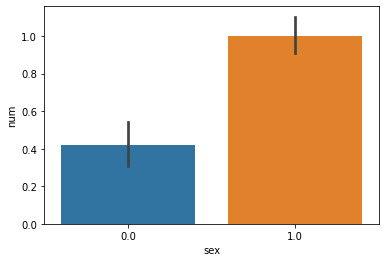

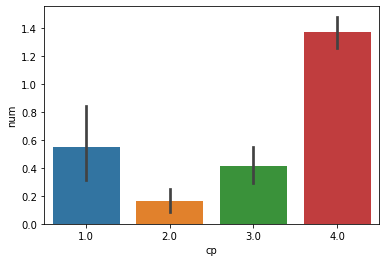

In [97]:
for i in cat.columns:
    plt.figure()
#     sns.lineplot(x=i,y=df['num'].mean(),data=df,color='red')
    sns.barplot(x=i, y='num',data=df)
plt.show()
    
#drop nothing

In [98]:
non_cat

,trestbps,chol,thalach,oldpeak,age
Country,,,,,
Cleveland,145.0,233.0,150.0,2.3,63.0
Cleveland,160.0,286.0,108.0,1.5,67.0
Cleveland,120.0,229.0,129.0,2.6,67.0
Cleveland,130.0,250.0,187.0,3.5,37.0
Cleveland,130.0,204.0,172.0,1.4,41.0
...,...,...,...,...,...
Hungarian,160.0,331.0,94.0,2.5,52.0
Hungarian,130.0,294.0,100.0,0.0,54.0
Hungarian,155.0,342.0,150.0,3.0,56.0


In [100]:
from sklearn.preprocessing import KBinsDiscretizer
discreate=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discreate.fit_transform(non_cat), index=non_cat.index, columns=non_cat.columns).add_suffix('_Rank')
num_binned

,trestbps_Rank,chol_Rank,thalach_Rank,oldpeak_Rank,age_Rank
Country,,,,,
Cleveland,7.0,4.0,6.0,6.0,8.0
Cleveland,8.0,7.0,1.0,4.0,9.0
Cleveland,2.0,4.0,3.0,6.0,9.0
Cleveland,4.0,5.0,9.0,6.0,0.0
Cleveland,4.0,2.0,8.0,4.0,1.0
...,...,...,...,...,...
Hungarian,8.0,8.0,0.0,6.0,4.0
Hungarian,4.0,7.0,0.0,1.0,5.0
Hungarian,7.0,8.0,6.0,6.0,6.0


In [102]:
num_binned['trestbps_Rank'].unique()

array([7., 8., 2., 4., 6., 1., 5., 0., 3.])

In [104]:
non_cat['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  95.,  80., 185.,  98., 190.,
       113.,  92.])

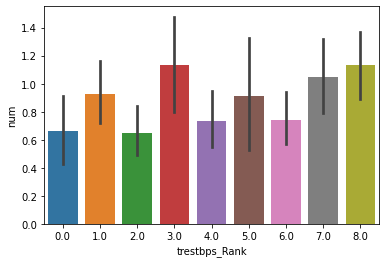

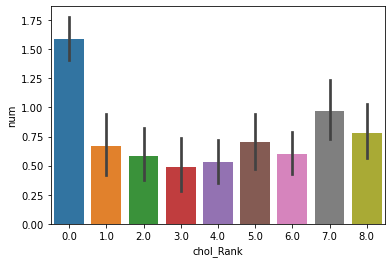

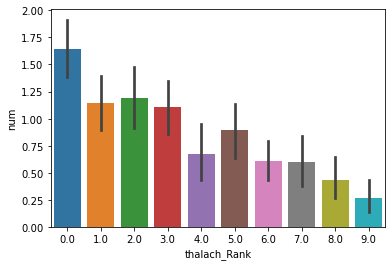

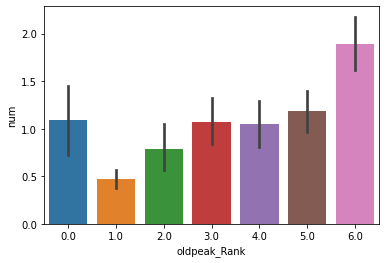

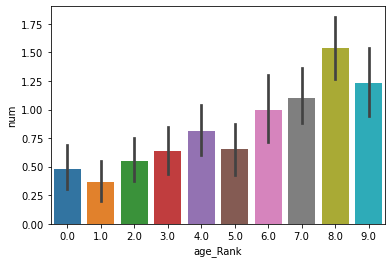

In [112]:
for i in num_binned:
    #plt.figure()
    sns.barplot(x=i, y=df['num'],data=num_binned) # estimator='mean')
    plt.show()
    
#drop chol

In [114]:
non_cat.drop(['chol'], axis=1)

,trestbps,thalach,oldpeak,age
Country,,,,
Cleveland,145.0,150.0,2.3,63.0
Cleveland,160.0,108.0,1.5,67.0
Cleveland,120.0,129.0,2.6,67.0
Cleveland,130.0,187.0,3.5,37.0
Cleveland,130.0,172.0,1.4,41.0
...,...,...,...,...
Hungarian,160.0,94.0,2.5,52.0
Hungarian,130.0,100.0,0.0,54.0
Hungarian,155.0,150.0,3.0,56.0


In [119]:
full = pd.concat([non_cat, cat], axis=1)

,trestbps,chol,thalach,oldpeak,age,fbs,restecg,exang,sex,cp
Country,,,,,,,,,,
Cleveland,145.0,233.0,150.0,2.3,63.0,1.0,2.0,0.0,1.0,1.0
Cleveland,160.0,286.0,108.0,1.5,67.0,0.0,2.0,1.0,1.0,4.0
Cleveland,120.0,229.0,129.0,2.6,67.0,0.0,2.0,1.0,1.0,4.0
Cleveland,130.0,250.0,187.0,3.5,37.0,0.0,0.0,0.0,1.0,3.0
Cleveland,130.0,204.0,172.0,1.4,41.0,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
Hungarian,160.0,331.0,94.0,2.5,52.0,0.0,0.0,1.0,1.0,4.0
Hungarian,130.0,294.0,100.0,0.0,54.0,0.0,1.0,1.0,0.0,3.0
Hungarian,155.0,342.0,150.0,3.0,56.0,1.0,0.0,1.0,1.0,4.0


In [120]:
# train test split
X = full
y = df['num']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 200)

In [155]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=200)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=200)

In [156]:
model.score(X_test,y_test)

0.5740740740740741

In [158]:
tree_prediction = model.predict(X_test)

In [166]:
from sklearn import metrics
print("accuracy", metrics.accuracy_score(y_test, tree_prediction))
print("precision", metrics.precision_score(y_test, tree_prediction,average='weighted'))
print("recall", metrics.recall_score(y_test, tree_prediction,average='weighted'))
print("F1 score", metrics.f1_score(y_test, tree_prediction,average='weighted'))

accuracy 0.5740740740740741
precision 0.5843104712185363
recall 0.5740740740740741
F1 score 0.5783139599533215


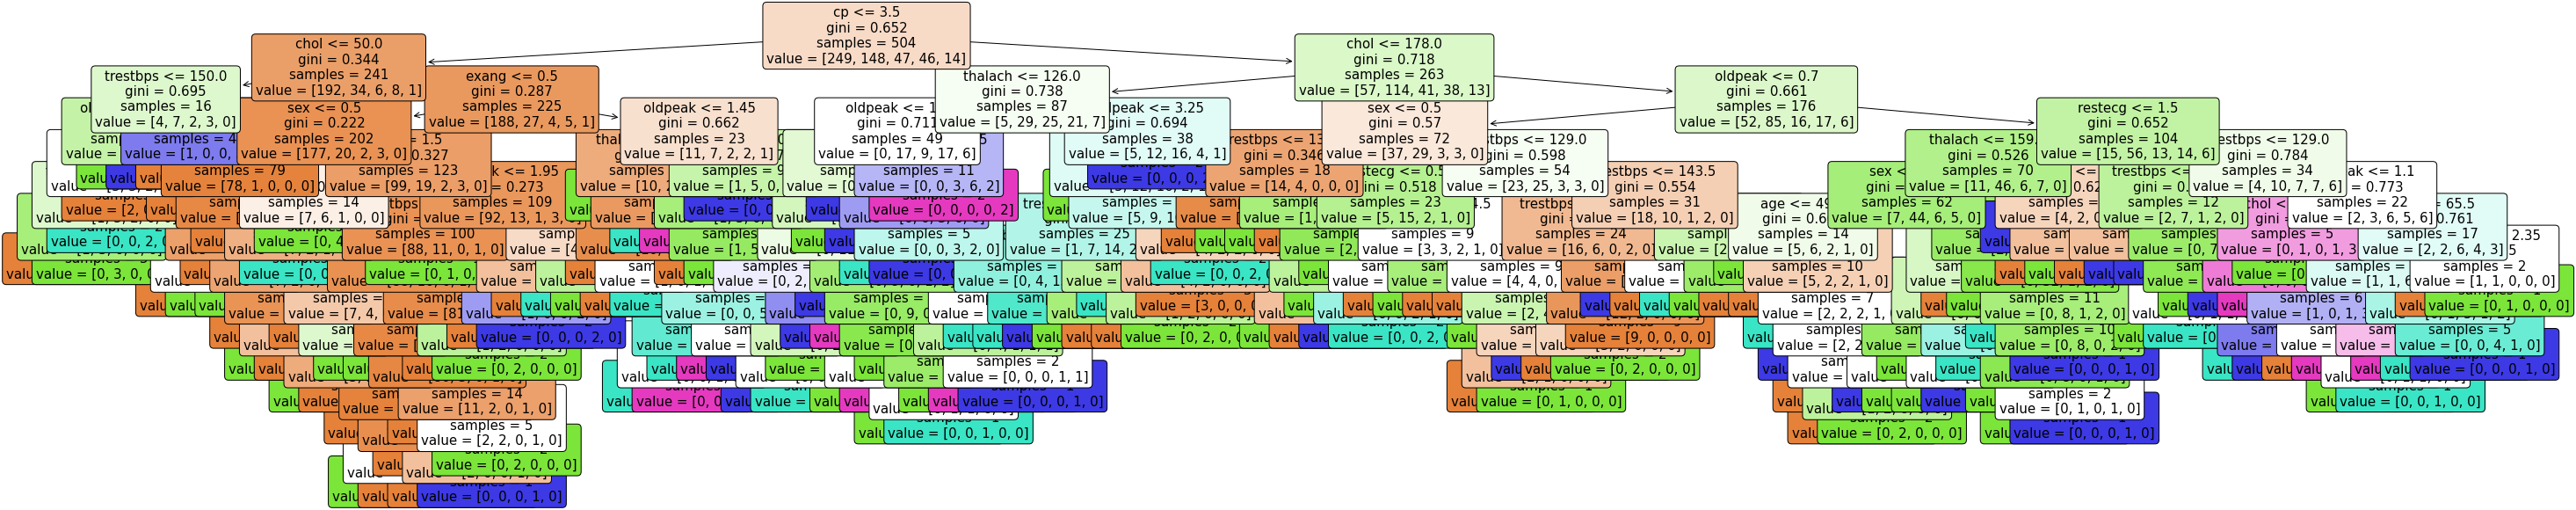

In [167]:
from sklearn import tree
import pydotplus
plt.figure(figsize=[50,10])
tree.plot_tree(model,filled=True, fontsize=15, rounded=True, feature_names=X.columns)
plt.show()

In [168]:
from sklearn.ensemble import RandomForestClassifier 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
rf_prediction = rf_model.predict(X_test)

In [172]:
from sklearn import metrics
print("accuracy", metrics.accuracy_score(y_test, rf_prediction))
print("precision", metrics.precision_score(y_test, rf_prediction,average='weighted'))
print("recall", metrics.recall_score(y_test, rf_prediction,average='weighted'))
print("F1 score", metrics.f1_score(y_test, rf_prediction,average='weighted'))

accuracy 0.6481481481481481
precision 0.620683311610731
recall 0.6481481481481481
F1 score 0.6224836415062478


In [174]:
from sklearn.svm import SVC
svm = SVC(C=1.0,kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [175]:
s_prediction = svm.predict(X_test)

In [176]:
from sklearn import metrics
print("accuracy", metrics.accuracy_score(y_test, s_prediction))
print("precision", metrics.precision_score(y_test, s_prediction,average='weighted'))
print("recall", metrics.recall_score(y_test, s_prediction,average='weighted'))
print("F1 score", metrics.f1_score(y_test, s_prediction,average='weighted'))

accuracy 0.5740740740740741
precision 0.4420781893004115
recall 0.5740740740740741
F1 score 0.47678616658916756


In [177]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print(i+1, indices[i], importances[indices[i]])

1 1 0.16681871155052416
2 2 0.161266808733888
3 4 0.13473733795848972
4 3 0.12822348198047548
5 9 0.12444840790398559
6 0 0.1222720548338707
7 7 0.06507521378297475
8 6 0.043221809706045486
9 8 0.03982408066534968
10 5 0.014112092884396592


<AxesSubplot:>

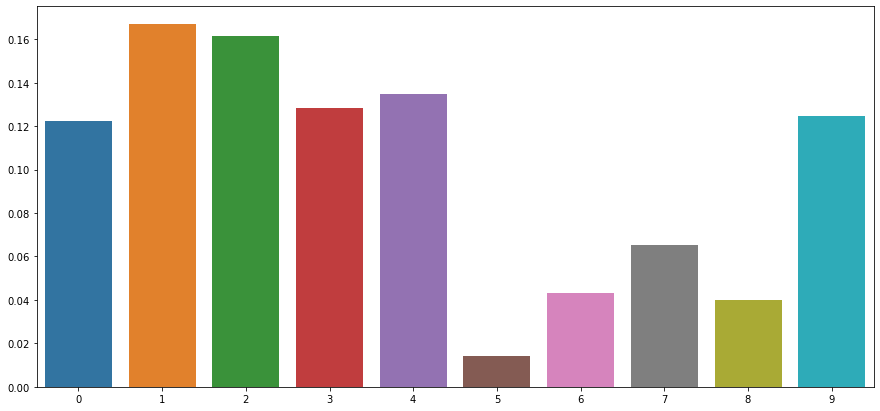

In [189]:
plt.figure(figsize=(15,7))
sns.barplot(x=indices, y=importances[indices])

In [190]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=5)
kmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [191]:
k_prediction = kmodel.predict(X_test)

In [192]:
from sklearn import metrics
print("accuracy", metrics.accuracy_score(y_test, k_prediction))
print("precision", metrics.precision_score(y_test, k_prediction,average='weighted'))
print("recall", metrics.recall_score(y_test, k_prediction,average='weighted'))
print("F1 score", metrics.f1_score(y_test, k_prediction,average='weighted'))

accuracy 0.5509259259259259
precision 0.4895457913881191
recall 0.5509259259259259
F1 score 0.5058575660748931
